# Sentiment Analysis of Instagram App Reviews




# Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [ ]:
df = pd.read_csv('/content/instagram.csv') # taken for Kaggle

df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,08-07-23 14:18
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,19-07-23 20:52
2,Google Play,"For a brand new app, it's very well optimized....",3,06-07-23 23:03
3,Google Play,"Great app with a lot of potential! However, th...",3,10-07-23 0:53
4,Google Play,"The app is good, but it needs a lot of functio...",3,06-07-23 16:57


# Shape of dataset

In [ ]:
rows, cols = df.shape
print(f"Number of rows = {rows} \nNumber of columns = {cols}")


Number of rows = 32910 
Number of columns = 4


# Identify and Remove Duplicate data

In [ ]:
if df.duplicated().sum() == 0:
  print("There is no duplicate data.")

else:
  print(f"There are {df.duplicated().sum()} duplicate values found and they are dropped!")
  df = df.drop_duplicates()

There are 66 duplicate values found and they are dropped!


# Retrieving Review Values

In [ ]:
df['review_description'][0]

"Meh. Not the greatest experience on a Chromebook. Seems to be customized for phones only. Opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. Judging from the fact that every other app I know of is resizeable, this seems like it was a conscious choice by the developers . Why you'd do something like this is beyond understanding and suggests a control freak approach. Not a great way to make a first impression."

# Data Description

In [ ]:
sept.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,32844.0,3.395445,1.751759,1.0,1.0,4.0,5.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32844 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32844 non-null  object
 1   review_description  32844 non-null  object
 2   rating              32844 non-null  int64 
 3   review_date         32844 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Identify Null values

In [ ]:
sept.isna().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

# Function to classify Sentiment Score

In [ ]:
def analyze(x):
        # Positive > 0.5 or Positive = 0.5
        if(x>=0.5):
            return "Positive"
        # Negative > -0.5 or Negative = -0.5
        elif x<=-0.5:
            return "Negative"
        # -0.5 < Neutral < 0.5
        else:
            return "Neutral"

# Function to calculate sentiment score using TextBlob

In [ ]:
def score(x):
        blob = TextBlob(x)
        return blob.sentiment.polarity

In [ ]:
sept['score']=sept['review_description'].apply(score)
sept['analysis']=septpt['score'].apply(analyze)

In [ ]:
septpt.head()

,source,review_description,rating,review_date,score,analysis
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,08-07-23 14:18,0.092187,Neutral
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,19-07-23 20:52,0.282205,Neutral
2,Google Play,"For a brand new app, it's very well optimized....",3,06-07-23 23:03,0.153438,Neutral
3,Google Play,"Great app with a lot of potential! However, th...",3,10-07-23 0:53,0.128571,Neutral
4,Google Play,"The app is good, but it needs a lot of functio...",3,06-07-23 16:57,0.313333,Neutral


In [ ]:
septpt['analysis'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
septpt["rating"].value_counts()

5    15495
1     9725
4     3244
3     2584
2     1796
Name: rating, dtype: int64

In [ ]:
sept.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,32844.0,3.395445,1.751759,1.0,1.0,4.000000,5.0,5.0
score,32844.0,0.208894,0.390372,-1.0,0.0,0.081318,0.5,1.0


In [ ]:
sept.describe(include='object').T

,count,unique,top,freq
source,32844,2,Google Play,30209
review_description,32844,26706,Good,776
review_date,32844,11749,06-07-23 16:43,22
analysis,32844,3,Neutral,21766


# Define a rating function to classify rating.

In [ ]:
def rating(x):
    # Convert x to a numeric format (assuming x is in string format)
    x = float(x)

    if x >= 8 and x <= 10:
        return 'Positive'
    elif x >= 4 and x <= 7:
        return 'Neutral'
    else:
        return 'Negative'




In [ ]:
df['rating_analysis']=df['rating'].apply(rating)

In [ ]:
df['final_rating'] = 'Positive'

In [ ]:
conditions = [
    (df['analysis'] == 'Positive') & (df['rating_analysis'] == 'Positive'),
    ((df['analysis'] == 'Positive') & (df['rating_analysis'] == 'Neutral')) | ((df['analysis'] == 'Neutral') & (df['rating_analysis'] == 'Positive')),
    ((df['analysis'] == 'Negative') & (df['rating_analysis'] == 'Neutral')) | ((df['analysis'] == 'Neutral') & (df['rating_analysis'] == 'Negative')),
    (df['analysis'] == 'Neutral') & (df['rating_analysis'] == 'Neutral'),
    (df['analysis'] == 'Negative') & (df['rating_analysis'] == 'Negative')
]
choices = ['Positive', 'Positive', 'Neutral', 'Neutral', 'Negative']
df['final_rating'] = np.select(conditions, choices, default='Neutral')


print(df[['review_description', 'analysis', 'rating_analysis', 'final_rating']])

                                      review_description  analysis  \
0      Meh. Not the greatest experience on a Chromebo...   Neutral   
1      Pretty good for a first launch!! Its easy to u...   Neutral   
2      For a brand new app, it's very well optimized....   Neutral   
3      Great app with a lot of potential! However, th...   Neutral   
4      The app is good, but it needs a lot of functio...   Neutral   
...                                                  ...       ...   
32905  This killed my dog. Mark zuckerburg strangled ...   Neutral   
32906              Add Search and hashtag like Twitter !   Neutral   
32907                                        bad twister  Negative   
32908                       Yet another trash from Meta.   Neutral   
32909  Nothing special this app is just a copy of twi...   Neutral   

      rating_analysis final_rating  
0            Negative      Neutral  
1            Negative      Neutral  
2            Negative      Neutral  
3          

In [ ]:
df.head()

,source,review_description,rating,review_date,score,analysis,rating_analysis,final_rating
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,08-07-23 14:18,0.092187,Neutral,Negative,Neutral
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,19-07-23 20:52,0.282205,Neutral,Negative,Neutral
2,Google Play,"For a brand new app, it's very well optimized....",3,06-07-23 23:03,0.153438,Neutral,Negative,Neutral
3,Google Play,"Great app with a lot of potential! However, th...",3,10-07-23 0:53,0.128571,Neutral,Negative,Neutral
4,Google Play,"The app is good, but it needs a lot of functio...",3,06-07-23 16:57,0.313333,Neutral,Negative,Neutral


In [ ]:
df.tail()

,source,review_description,rating,review_date,score,analysis,rating_analysis,final_rating
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,06-07-23 1:23,-0.200000,Neutral,Negative,Neutral
32906,App Store,Add Search and hashtag like Twitter !,1,19-07-23 8:01,0.000000,Neutral,Negative,Neutral
32907,App Store,bad twister,1,17-07-23 6:39,-0.700000,Negative,Negative,Negative
32908,App Store,Yet another trash from Meta.,1,07-07-23 17:47,0.000000,Neutral,Negative,Neutral
32909,App Store,Nothing special this app is just a copy of twi...,1,07-07-23 7:01,0.357143,Neutral,Negative,Neutral


In [ ]:
df['final_rating'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

<Axes: xlabel='final_rating', ylabel='count'>

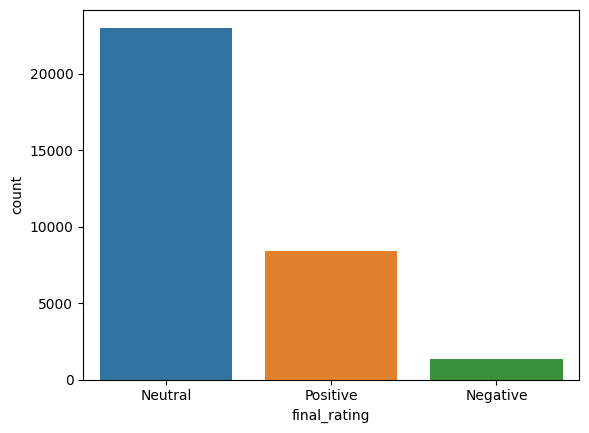

In [ ]:
sns.countplot(x='final_rating',data =df)

#According to analysis, as per public reviews, most of their responses on this app is NEUTRAL.

# **Time Phase**

In [ ]:
# Assuming 'review_date' is in string format
df['review_date'] = pd.to_datetime(df['review_date'], format='%d-%m-%y %H:%M')

def categorize_day_phase(date):
    day = date.day
    if 1 <= day <= 5:
        return 'phase 1'
    elif 6 <= day <= 10:
        return 'phase 2'
    elif 11 <= day <= 15:
        return 'phase 3'
    elif 16 <= day <= 20:
        return 'phase 4'
    elif 21 <= day <= 25:
        return 'phase 5'
    elif 26 <= day <= 31:
        return 'phase 6'

# Apply the categorization function to create a new column 'phase' based on day
df['phase'] = df['review_date'].apply(categorize_day_phase)


In [ ]:
# Sort the DataFrame based on 'phase'
df.sort_values(by='phase', inplace=True)


In [ ]:
# Define a function to calculate the rating for each group
def calculate_phase_rating(group):
    max_type = group['final_rating'].mode().iloc[0]
    total_count = group['final_rating'].count()
    return pd.Series({'type': max_type, 'count': total_count})

# Group the data by 'phase' and calculate the rating for each phase
phase_ratings = df.groupby('phase').apply(calculate_phase_rating)

# Reset the index to make it a DataFrame
phase_ratings = phase_ratings.reset_index()

# Display the phase ratings
print(phase_ratings)

     phase     type  count
0  phase 1  Neutral    362
1  phase 2  Neutral  25650
2  phase 3  Neutral   3771
3  phase 4  Neutral   1628
4  phase 5  Neutral   1433


In [ ]:
# Create a DataFrame to store the percentage of each sentiment in every phase
sentiment_percentage_df = pd.DataFrame(columns=['phase', 'Neutral', 'Positive', 'Negative'])

# Iterate through each phase
for phase in df['phase'].unique():
    # Filter the DataFrame for the current phase
    phase_df = df[df['phase'] == phase]

    # Calculate the total number of reviews in the current phase
    total_reviews = len(phase_df)

    # Calculate the percentage of each sentiment in the current phase
    neutral_percentage = (phase_df['final_rating'] == 'Neutral').sum() / total_reviews * 100
    positive_percentage = (phase_df['final_rating'] == 'Positive').sum() / total_reviews * 100
    negative_percentage = (phase_df['final_rating'] == 'Negative').sum() / total_reviews * 100

    # Add the phase and sentiment percentages to the sentiment_percentage_df
    sentiment_percentage_df = sentiment_percentage_df.append({
        'phase': phase,
        'Neutral': neutral_percentage,
        'Positive': positive_percentage,
        'Negative': negative_percentage
    }, ignore_index=True)

print(sentiment_percentage_df)


     phase    Neutral   Positive   Negative
0  phase 1  70.165746  26.795580   3.038674
1  phase 2  69.485380  27.348928   3.165692
2  phase 3  71.519491  22.275259   6.205251
3  phase 4  74.078624  16.277641   9.643735
4  phase 5  73.621773  15.631542  10.746685


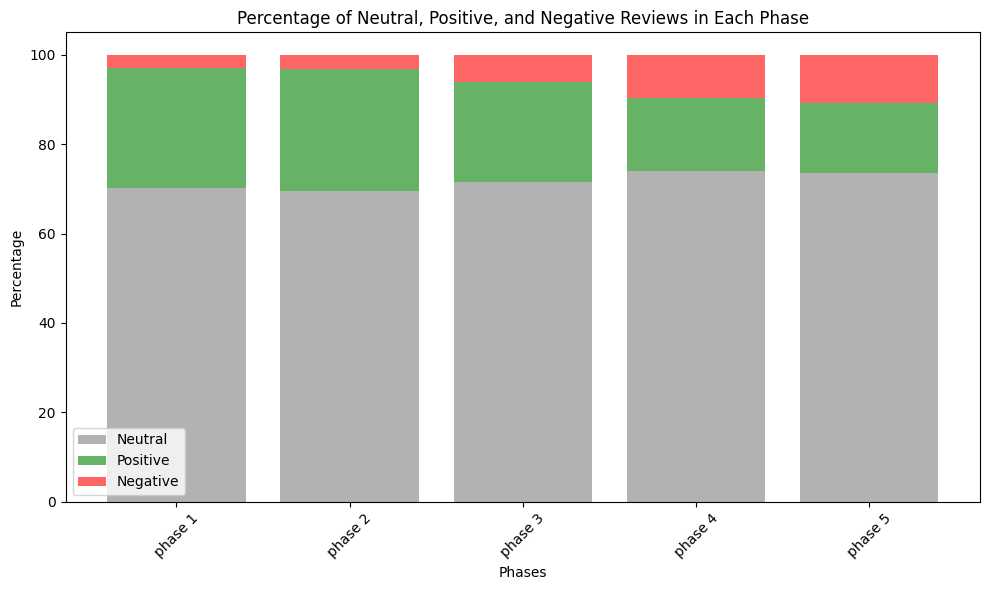

In [ ]:
import matplotlib.pyplot as plt

sentiment_percentage_df = sentiment_percentage_df.sort_values(by='phase')
x = sentiment_percentage_df['phase']
neutral_percentages = sentiment_percentage_df['Neutral']
positive_percentages = sentiment_percentage_df['Positive']
negative_percentages = sentiment_percentage_df['Negative']


plt.figure(figsize=(10, 6))
plt.bar(x, neutral_percentages, label='Neutral', color='grey', alpha=0.6)
plt.bar(x, positive_percentages, label='Positive', color='green', alpha=0.6, bottom=neutral_percentages)
plt.bar(x, negative_percentages, label='Negative', color='red', alpha=0.6, bottom=neutral_percentages + positive_percentages)


plt.xlabel('Phases')
plt.ylabel('Percentage')
plt.title('Percentage of Neutral, Positive, and Negative Reviews in Each Phase')


plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
pip install --upgrade statsmodels

In [ ]:
!pip install statsmodels

In [88]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

data = {
    'phase': ['phase 1', 'phase 2', 'phase 3', 'phase 4', 'phase 5'],
    'Neutral': [70.165746, 69.485380, 71.519491, 74.078624, 73.621773],
    'Positive': [26.795580, 27.348928, 22.275259, 16.277641, 15.631542],
    'Negative': [3.038674, 3.165692, 6.205251, 9.643735, 10.746685]
}

df = pd.DataFrame(data)

df.set_index('phase', inplace=True)

# Define a function to forecast using ARIMA
def forecast_arima(data, column_name, steps):
    model = ARIMA(data[column_name], order=(1, 1, 1))
    model_fit = model.fit()
    forecasted = model_fit.forecast(steps=steps)
    return forecasted

initial_phases = 5
forecast_steps = 10
forecast_df = pd.DataFrame(columns=['Phase', 'Neutral', 'Positive', 'Negative'])


for column_name in ['Neutral', 'Positive', 'Negative']:
    forecast = forecast_arima(df, column_name, forecast_steps)
    forecast_df[column_name] = forecast


forecast_df['Phase'] = [f'phase {i}' for i in range(initial_phases + 1, initial_phases + forecast_steps + 1)]



summary_df = pd.DataFrame({
    'Month': ['August'],
    'Neutral': [forecast_df['Neutral'].mean()],
    'Positive': [forecast_df['Positive'].mean()],
    'Negative': [forecast_df['Negative'].mean()]
})

average_neutral_september = df['Neutral'].loc['phase 10':'phase 25'].mean()
average_positive_september = df['Positive'].loc['phase 10':'phase 25'].mean()
average_negative_september = df['Negative'].loc['phase 10':'phase 25'].mean()
summary_df.loc[1] = ['September', average_neutral_september, average_positive_september, average_negative_september]

print(summary_df)



       Month    Neutral   Positive   Negative
0     August  72.968349  16.890528  10.706148
1  September  69.485380  27.348928   3.165692


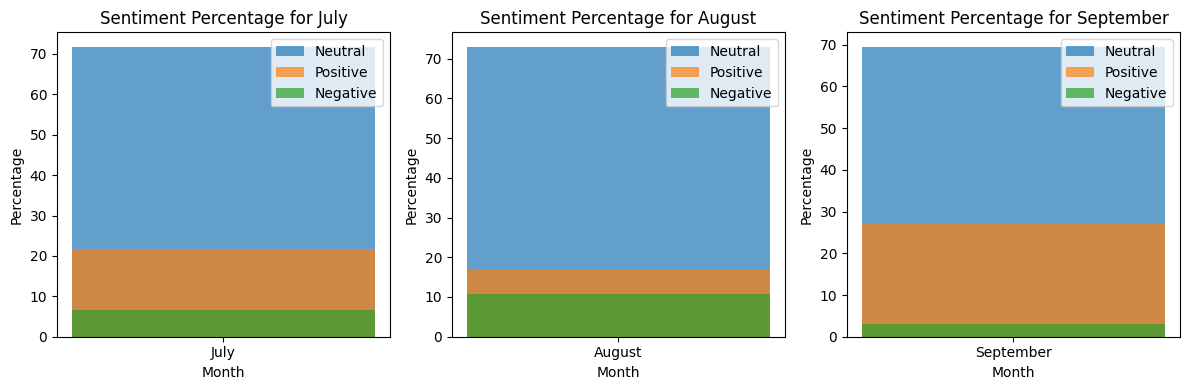

In [91]:
months = summary_df['Month']
neutral_percentages = summary_df['Neutral']
positive_percentages = summary_df['Positive']
negative_percentages = summary_df['Negative']


months = ['July'] + months.tolist()
neutral_percentages = [71.7742028] + neutral_percentages.tolist()
positive_percentages = [21.6657898] + positive_percentages.tolist()
negative_percentages = [6.5600074] + negative_percentages.tolist()


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(months[0], neutral_percentages[0], label='Neutral', alpha=0.7)
plt.bar(months[0], positive_percentages[0], label='Positive', alpha=0.7)
plt.bar(months[0], negative_percentages[0], label='Negative', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for July')
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(months[1], neutral_percentages[1], label='Neutral', alpha=0.7)
plt.bar(months[1], positive_percentages[1], label='Positive', alpha=0.7)
plt.bar(months[1], negative_percentages[1], label='Negative', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for August')
plt.legend()

plt.subplot(1, 3, 3)

september_data = summary_df[summary_df['Month'] == 'September']
september_neutral = september_data['Neutral']
september_positive = september_data['Positive']
september_negative = september_data['Negative']
plt.bar(months[2], september_neutral.values[0], label='Neutral', alpha=0.7)
plt.bar(months[2], september_positive.values[0], label='Positive', alpha=0.7)
plt.bar(months[2], september_negative.values[0], label='Negative', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for September')
plt.legend()

plt.tight_layout()
plt.show()
